# OVERVIEW #

This notebook imports the United States COVID and airline traveler DataFrame exported as .csv in the COVID19_Travel_Create_DataFrames notebook.


In the COVID19_Travel_Create_DataFrames.ipynb file, United States COVID data and airline traveler data was imported from .csv, saved in DataFrames, converted into useful datatypes, and then merged into a single DataFrame.  That DataFrame was then exported as a .csv file.


This notebook presents key questions about the data and creates visualizations using Seaborn.  

In [1]:
#Import Time, Datetime, MatPlotLib, Seaborn, Pandas, Numpy
import time
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# SECTION 1: Key Questions #

#### Here are key questions explored through this analysis: ####


1. What was 'typical' travel like each month in 2019 and 2020?  


2. What were the COVID trends in 2020 for those same date ranges?  


3. What was the correlation between COVID and travel in the *early* (March/April), *middle* (May -July), and *late( (Aug - Oct) parts of the 'first wave' of COVID 2020?

*Note: the longer term plan is to continue to follow the trend through the end of 2020 and into 2021 as the COVID second wave plays out this Fall/Winter.*

# SECTION 2: Import and Convert the Data #

#### Import and preview the .csv file ####

In [2]:
#Import the COVID DataFrame created and saved as .csv in the 'COVID19Travel_Create_DataFrames' notebook

covid_travel = pd.read_csv('covid_travel.csv')

#Preview the DataFrame

covid_travel.tail()

,Unnamed: 0,Cases,Deaths,Hospitalizations,2020 Traveler Count,2019 Traveler Count (Same Weekday)
259,2020-11-15,85177,467,2198,978297,2396681
260,2020-11-16,106744,562,2673,883157,2298856
261,2020-11-17,155142,844,4959,611497,1900895
262,2020-11-18,102010,475,2700,703135,2071631
263,2020-11-19,103308,420,2716,907332,2428095


*The use of the .csv file added added a numbered index to the data, instead of using the dates as the index.  This is beneficial because the dates need to be in their own column in order to include them in the visualizations.


#### Check the datatypes and rename the dates column ####

In [3]:
#Check the datatypes
covid_travel.info()

#The dates column can be renamed and the values re-converted to date datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Unnamed: 0                          264 non-null    object
 1   Cases                               264 non-null    int64 
 2   Deaths                              264 non-null    int64 
 3   Hospitalizations                    264 non-null    int64 
 4   2020 Traveler Count                 264 non-null    int64 
 5   2019 Traveler Count (Same Weekday)  264 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 12.5+ KB


In [4]:
#Rename the dates column, from 'Unnamed'

covid_df = covid_travel.rename(columns = {"Unnamed: 0": "Date"})
covid_df.head()

,Date,Cases,Deaths,Hospitalizations,2020 Traveler Count,2019 Traveler Count (Same Weekday)
0,2020-03-01,234,12,71,2280522,2301439
1,2020-03-02,163,14,47,2089641,2257920
2,2020-03-03,261,11,59,1736393,1979558
3,2020-03-04,217,14,66,1877401,2143619
4,2020-03-05,252,8,72,2130015,2402692


#### Convert the datatypes ####

In [5]:
#Import the datetime module
import datetime

#Convert the dates in the date column
covid_df['Date'] = pd.to_datetime(covid_df['Date'])

#Check the datatype for each column - the Date column is now datetime
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Date                                264 non-null    datetime64[ns]
 1   Cases                               264 non-null    int64         
 2   Deaths                              264 non-null    int64         
 3   Hospitalizations                    264 non-null    int64         
 4   2020 Traveler Count                 264 non-null    int64         
 5   2019 Traveler Count (Same Weekday)  264 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 12.5 KB


In [6]:
covid_df.head()

,Date,Cases,Deaths,Hospitalizations,2020 Traveler Count,2019 Traveler Count (Same Weekday)
0,2020-03-01,234,12,71,2280522,2301439
1,2020-03-02,163,14,47,2089641,2257920
2,2020-03-03,261,11,59,1736393,1979558
3,2020-03-04,217,14,66,1877401,2143619
4,2020-03-05,252,8,72,2130015,2402692


# SECTION 3: Create categories for plotting #

#### Create bins to summarize the data by month ####


Datetime datatypes cannot be binned with the pd.cut() method.


Instead, a month index (number of the month) is created for each date first and that is used for the bins.

In [8]:
#Create a month index for each date and list as a separate column
covid_df["Month_Index"] = pd.DatetimeIndex(covid_df["Date"]).month
 
#Create bins using pd.cut() on the new "Month" column and append them to the DataFrame
month_bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
month_labels = ["Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec", "Jan"]
covid_df["Month"] = pd.cut(covid_df["Month_Index"], month_bins, labels=month_labels)

covid_df.tail()

,Date,Cases,Deaths,Hospitalizations,2020 Traveler Count,2019 Traveler Count (Same Weekday),Month_Index,Month
259,2020-11-15,85177,467,2198,978297,2396681,11,Nov
260,2020-11-16,106744,562,2673,883157,2298856,11,Nov
261,2020-11-17,155142,844,4959,611497,1900895,11,Nov
262,2020-11-18,102010,475,2700,703135,2071631,11,Nov
263,2020-11-19,103308,420,2716,907332,2428095,11,Nov


#### Pivot the data so that it can be plotted ####

In [9]:
#Use the pd.melt() method to pivot the 2019 and 2020 traveler counts so that they can be called from the same column
tsa_plots = pd.melt(covid_df, id_vars=['Date'], value_vars=['2020 Traveler Count', '2019 Traveler Count (Same Weekday)'], var_name='Travelers', value_name='Counts')
tsa_plots

,Date,Travelers,Counts
0,2020-03-01,2020 Traveler Count,2280522
1,2020-03-02,2020 Traveler Count,2089641
2,2020-03-03,2020 Traveler Count,1736393
3,2020-03-04,2020 Traveler Count,1877401
4,2020-03-05,2020 Traveler Count,2130015
...,...,...,...
523,2020-11-15,2019 Traveler Count (Same Weekday),2396681
524,2020-11-16,2019 Traveler Count (Same Weekday),2298856
525,2020-11-17,2019 Traveler Count (Same Weekday),1900895
526,2020-11-18,2019 Traveler Count (Same Weekday),2071631


In [10]:
#Use the pd.melt() method to pivot the covid counts so that they can be called from the same column
covid_plots = pd.melt(covid_df, id_vars=['Month'], value_vars=['Cases', 'Deaths', 'Hospitalizations'], var_name='COVID Metrics', value_name='Counts')
covid_plots


,Month,COVID Metrics,Counts
0,Mar,Cases,234
1,Mar,Cases,163
2,Mar,Cases,261
3,Mar,Cases,217
4,Mar,Cases,252
...,...,...,...
787,Nov,Hospitalizations,2198
788,Nov,Hospitalizations,2673
789,Nov,Hospitalizations,4959
790,Nov,Hospitalizations,2700


# SECTION 4: Visualizations #

## Question 1: What did 2019 and 2020 Airline Travel count look like? ##

My prediction is that there will be far less travelers in 2019 than in 2020.

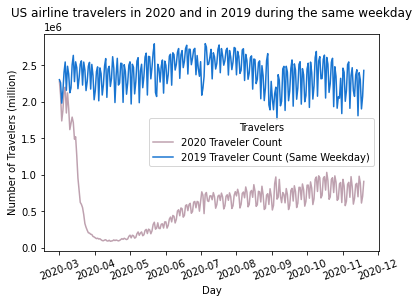

In [11]:
#Display the trend with a lineplot, set line colors using hex codes
hue_colors = {"2020 Traveler Count": "#bea1af", "2019 Traveler Count (Same Weekday)": "#1975d1"}
g = sns.lineplot(x="Date", y="Counts", hue="Travelers", data=tsa_plots, palette=hue_colors)
plt.ylabel("Number of Travelers (million)")
plt.xlabel("Day")
plt.xticks(rotation=20)
g.set_title("US airline travelers in 2020 and in 2019 during the same weekday", y=1.05)
plt.show()
g.figure.savefig('travel.png')

#this code can include a 30-degree rotation for the date labels, however this causes the x-axis label "Day" to get cut off in the exported image.

## Question 2: What were the COVID trends in 2020 for those same date ranges? ##

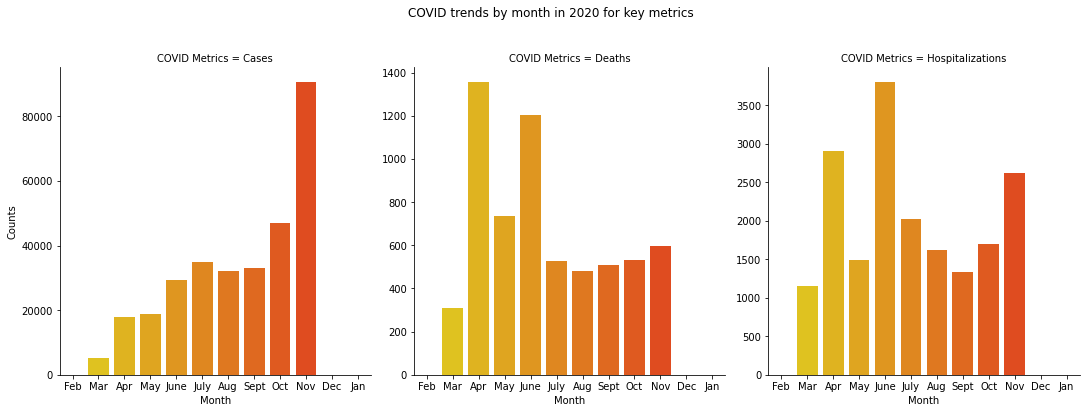

In [12]:
#Create a histogram with subplots to visualize this detail
g = sns.catplot(x="Month", y="Counts", col="COVID Metrics", data=covid_plots, kind="bar", palette="autumn_r", ci=None, sharey=False)
g.fig.suptitle("COVID trends by month in 2020 for key metrics", y=1.10)
plt.show()
g.savefig('covid.png')


## Question 3: What was the correlation between COVID and Travel during the stages of COVID in 2020? ##

| COVID Stage       | Early First Wave               | Middle First Wave                    | Late First Wave
| :-----------------| :---------------------------   | :----------------------------------- | :-------------------------------------
| Dates             | March - April, 2020            | May - July, 2020                     | August - October, 2020
|                   |                                |                                      | 
| key circumstances | first cases and US lockdown    | US re-opening was heavily debated,   | safety measures are in place,
|                   |                                | safety measures were designed,       | many businesses re-opened,
|                   |                                | protesting occurred about racial     | children and college students returned to school
|                   |                                | injustice and demands for re-opening | with a mix of remote and in-person learning
|




| COVID Stage       | Early Second Wave              | Middle Second Wave                   | Late Second Wave
| :-----------------| :---------------------------   | :----------------------------------- | :-------------------------------------
| Dates             | November - tbd, 2020           | tbd                                  | tbd
|                   |                                |                                      | 
| key circumstances | cold and flu season has begun, |                                      | 
|                   | cold weather drove people to   |                                      | 
|                   | contract COVID through intimate|                                      | 
|                   | indoor gatherings,             |                                      | 
|                   | Halloween has just passed and  |                                      |
|                   | winter holidays are occurring  |                                      |



#### Categorize the data into 'Waves' in order to visualize this trend ####

In [17]:
#Create bins to label each period and use pd.cut() on the "Month_Index" column and append them to the DataFrame
period_bins = [1, 5, 8, 10, 12]
period_labels = ["Early First Wave", "Middle First Wave", "Late First Wave", "Early Second Wave"]
                 
covid_df["Wave"] = pd.cut(covid_df["Month_Index"], period_bins, labels=period_labels)

covid_df.tail()    

,Date,Cases,Deaths,Hospitalizations,2020 Traveler Count,2019 Traveler Count (Same Weekday),Month_Index,Month,Wave
259,2020-11-15,85177,467,2198,978297,2396681,11,Nov,Early Second Wave
260,2020-11-16,106744,562,2673,883157,2298856,11,Nov,Early Second Wave
261,2020-11-17,155142,844,4959,611497,1900895,11,Nov,Early Second Wave
262,2020-11-18,102010,475,2700,703135,2071631,11,Nov,Early Second Wave
263,2020-11-19,103308,420,2716,907332,2428095,11,Nov,Early Second Wave


#### Scale down the 2020 Traveler Count by a factor of 10 ####


The numbers of travelers are so much larger than the number of COVID cases that it is difficult to see the increases/decreases in values when they are plotted together.

In [18]:
#Scale down the 2020 Traveler Count so that the trends can be visualized with COVID trends more easily on the chart

covid_df["Scaled 2020 Traveler Count"] = covid_df["2020 Traveler Count"] / 10


In [19]:
#Then pivot the dataframe and select only the colunmns needed for the plot
line_df = pd.melt(covid_df, id_vars=['Month'], value_vars=['Scaled 2020 Traveler Count', 'Cases'], var_name='Comparison', value_name='Counts')
line_df.head()

,Month,Comparison,Counts
0,Mar,Scaled 2020 Traveler Count,228052.2
1,Mar,Scaled 2020 Traveler Count,208964.1
2,Mar,Scaled 2020 Traveler Count,173639.3
3,Mar,Scaled 2020 Traveler Count,187740.1
4,Mar,Scaled 2020 Traveler Count,213001.5


#### Create the visualization ####

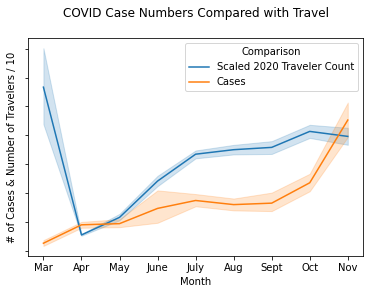

In [21]:
#Display the trend with a lineplot, set line colors using hex codes
g = sns.lineplot(x="Month", y="Counts", hue="Comparison", data=line_df)
plt.ylabel("# of Cases & Number of Travelers / 10")
plt.xlabel("Month")
g.set_title("COVID Case Numbers Compared with Travel", y=1.07)
g.set(yticklabels=[])
plt.show()
g.figure.savefig('covid_travel_line.png')


#### Plot the same data with a bar chart, using 'Waves' instead of Month ####

In [22]:
#Pivot the COVID dataframe by wave instead of month and select only the colunmns needed for the plot
bar_df = pd.melt(covid_df, id_vars=['Wave'], value_vars=['Scaled 2020 Traveler Count', 'Cases'], var_name='Comparison', value_name='Counts')
bar_df.head()

,Wave,Comparison,Counts
0,Early First Wave,Scaled 2020 Traveler Count,228052.2
1,Early First Wave,Scaled 2020 Traveler Count,208964.1
2,Early First Wave,Scaled 2020 Traveler Count,173639.3
3,Early First Wave,Scaled 2020 Traveler Count,187740.1
4,Early First Wave,Scaled 2020 Traveler Count,213001.5


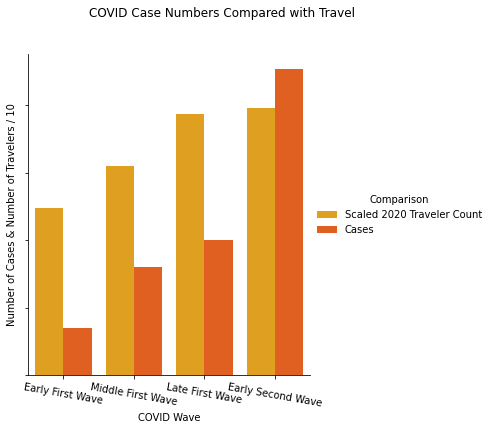

In [27]:
#diplay the same trend, broken into 'Waves' with a bar chart
g = sns.catplot(x="Wave", y="Counts", hue="Comparison", data=bar_df, kind="bar", palette="autumn_r", ci=None)
g.fig.suptitle("COVID Case Numbers Compared with Travel", y=1.10)
g.set_axis_labels("COVID Wave", "Number of Cases & Number of Travelers / 10")
plt.xticks(rotation=-10)
g.set(yticklabels=[])
plt.show()
g.savefig('covid_travel_bar.png')